In [3]:
import pandas as pd

# Load CSV without parsing dates first
df = pd.read_csv("Nat_Gas data jpmorgan.csv")  

# Convert Dates column to datetime with explicit format
df["Dates"] = pd.to_datetime(df["Dates"], format="%m/%d/%y")

# Sort and set index
df = df.sort_values("Dates")
df.set_index("Dates", inplace=True)

# Preview
df.head()



,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


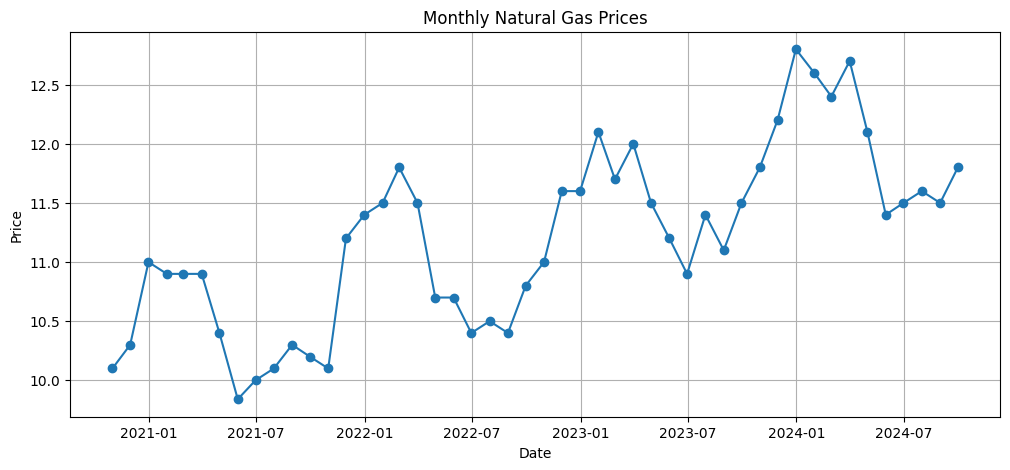

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Prices"], marker='o')
plt.title("Monthly Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [5]:
daily_prices = df.resample("D").interpolate()
daily_prices.head(10)


,Prices
Dates,
2020-10-31,10.100000
2020-11-01,10.106667
2020-11-02,10.113333
2020-11-03,10.120000
2020-11-04,10.126667
2020-11-05,10.133333
2020-11-06,10.140000
2020-11-07,10.146667
2020-11-08,10.153333


In [6]:
import numpy as np
last_date = daily_prices.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365)
last_year = df[-12:]
monthly_changes = last_year["Prices"].diff().dropna()
avg_monthly_change = monthly_changes.mean()
daily_change = avg_monthly_change / 30
future_prices = [daily_prices["Prices"][-1] + daily_change*(i+1) for i in range(len(future_dates))]
future_df = pd.DataFrame({"Prices": future_prices}, index=future_dates)
full_df = pd.concat([daily_prices, future_df])
full_df.tail(10)


/tmp/ipykernel_3577/747762577.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_prices = [daily_prices["Prices"][-1] + daily_change*(i+1) for i in range(len(future_dates))]


,Prices
2025-09-21,11.8
2025-09-22,11.8
2025-09-23,11.8
2025-09-24,11.8
2025-09-25,11.8
2025-09-26,11.8
2025-09-27,11.8
2025-09-28,11.8
2025-09-29,11.8
2025-09-30,11.8


In [9]:
def price_on_date(input_date):
    date = pd.to_datetime(input_date)
    if date in full_df.index:
        return full_df.loc[date, "Prices"]
    else:
        return float(np.interp(pd.Timestamp(date).value,
                               full_df.index.values.astype(np.int64),
                               full_df["Prices"].values))
print(price_on_date("2023-08-15"))
print(price_on_date("2025-03-01"))


11.254838709677419
11.8


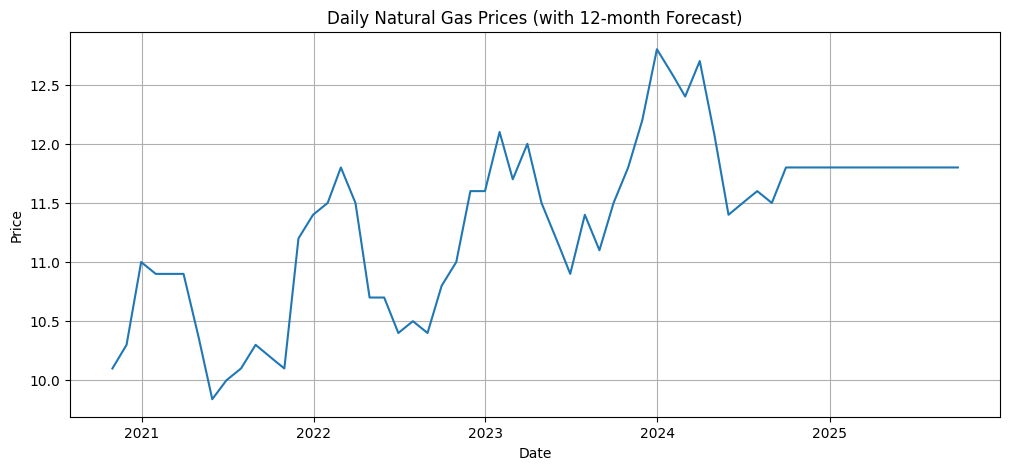

In [10]:
plt.figure(figsize=(12,5))
plt.plot(full_df.index, full_df["Prices"])
plt.title("Daily Natural Gas Prices (with 12-month Forecast)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

